In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [98]:
cz_employment = "gender_cz.xls"

In [99]:
#Read in the data 
cz_employment_data = pd.read_excel(cz_employment)

In [100]:
cz_employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Columns: 130 entries, cz to e_rank_b_kir26_m_p25
dtypes: float64(127), object(3)
memory usage: 753.7+ KB


In [101]:
cz_employment_data.head()

,cz,czname,stateabbrv,state_id,w2_or_sc_nz_30_q1_f,w2_or_sc_nz_30_q1_m,w2_or_sc_nz_30_q2_f,w2_or_sc_nz_30_q2_m,w2_or_sc_nz_30_q3_f,w2_or_sc_nz_30_q3_m,...,rel_tot,crime_violent,cs_fam_wkidsinglemom,cs_divorced,cs_married,cs_race_bla_st,cs00_seg_inc_pov25_st,cs_fam_wkidsinglemom_st,e_rank_b_kir26_f_p25,e_rank_b_kir26_m_p25
0,100.0,Johnson City,TN,Tennessee,0.726174,0.715894,0.758640,0.816232,0.820160,0.859901,...,0.514403,0.001410,0.189803,0.110173,0.600893,-0.993557,-1.628200,-0.797774,35.933529,42.548344
1,200.0,Morristown,TN,Tennessee,0.733542,0.705701,0.777444,0.797241,0.828439,0.851632,...,0.543895,0.001844,0.185106,0.115958,0.613359,-1.004128,-1.705706,-0.926699,36.643135,42.534821
2,301.0,Middlesborough,TN,Tennessee,0.723005,0.714844,0.730435,0.754902,0.893750,0.804348,...,0.667806,0.000854,0.211003,0.113451,0.590280,-1.055237,-2.150660,-0.215897,35.337341,42.436954
3,302.0,Knoxville,TN,Tennessee,0.739319,0.706208,0.770197,0.785239,0.806025,0.842893,...,0.601953,0.001344,0.205602,0.114278,0.575150,-0.639860,0.199354,-0.364127,37.179638,41.772160
4,401.0,Winston-Salem,NC,North Carolina,0.776730,0.670466,0.801903,0.757033,0.853441,0.817878,...,0.487937,0.002658,0.220471,0.092351,0.585897,0.526716,-0.583715,0.043981,39.826893,40.760811


In [102]:
cz_employment_data.columns

Index(['cz', 'czname', 'stateabbrv', 'state_id', 'w2_or_sc_nz_30_q1_f',
       'w2_or_sc_nz_30_q1_m', 'w2_or_sc_nz_30_q2_f', 'w2_or_sc_nz_30_q2_m',
       'w2_or_sc_nz_30_q3_f', 'w2_or_sc_nz_30_q3_m',
       ...
       'rel_tot', 'crime_violent', 'cs_fam_wkidsinglemom', 'cs_divorced',
       'cs_married', 'cs_race_bla_st', 'cs00_seg_inc_pov25_st',
       'cs_fam_wkidsinglemom_st', 'e_rank_b_kir26_f_p25',
       'e_rank_b_kir26_m_p25'],
      dtype='object', length=130)

There are too many variables, let's do variable selection

In [103]:
print(cz_employment_data.columns.tolist())

['cz', 'czname', 'stateabbrv', 'state_id', 'w2_or_sc_nz_30_q1_f', 'w2_or_sc_nz_30_q1_m', 'w2_or_sc_nz_30_q2_f', 'w2_or_sc_nz_30_q2_m', 'w2_or_sc_nz_30_q3_f', 'w2_or_sc_nz_30_q3_m', 'w2_or_sc_nz_30_q4_f', 'w2_or_sc_nz_30_q4_m', 'w2_or_sc_nz_30_q5_f', 'w2_or_sc_nz_30_q5_m', 'w2_pos_30_q1_f', 'w2_pos_30_q1_m', 'w2_pos_30_q2_f', 'w2_pos_30_q2_m', 'w2_pos_30_q3_f', 'w2_pos_30_q3_m', 'w2_pos_30_q4_f', 'w2_pos_30_q4_m', 'w2_pos_30_q5_f', 'w2_pos_30_q5_m', 'w2_pos_30_var_q1_f', 'w2_pos_30_var_q1_m', 'w2_pos_30_var_q2_f', 'w2_pos_30_var_q2_m', 'w2_pos_30_var_q3_f', 'w2_pos_30_var_q3_m', 'w2_pos_30_var_q4_f', 'w2_pos_30_var_q4_m', 'w2_pos_30_var_q5_f', 'w2_pos_30_var_q5_m', 'w2_or_sc_nz_30_q1_f_sp', 'w2_or_sc_nz_30_q1_m_sp', 'w2_or_sc_nz_30_q2_f_sp', 'w2_or_sc_nz_30_q2_m_sp', 'w2_or_sc_nz_30_q3_f_sp', 'w2_or_sc_nz_30_q3_m_sp', 'w2_or_sc_nz_30_q4_f_sp', 'w2_or_sc_nz_30_q4_m_sp', 'w2_or_sc_nz_30_q5_f_sp', 'w2_or_sc_nz_30_q5_m_sp', 'w2_pos_30_q1_f_sp', 'w2_pos_30_q1_m_sp', 'w2_pos_30_q2_f_sp', 'w2_

Only interested in a number variables, hypothesis states that boys growing up in families in the botton quantile of the income distribution, we are using a more fluid definition of income to include non-employee compensation or self-employment income

In [104]:
cz_employment_analysis = cz_employment_data[['cz','czname','stateabbrv','state_id','w2_or_sc_nz_30_q1_m','w2_or_sc_nz_30_q2_m','w2_or_sc_nz_30_q3_m','w2_or_sc_nz_30_q4_m',
                                           'w2_or_sc_nz_30_q5_m','w2_or_sc_nz_30_q1_m_sp', 'w2_or_sc_nz_30_q2_m_sp','w2_or_sc_nz_30_q3_m_sp',
                                            'w2_or_sc_nz_30_q4_m_sp', 'w2_or_sc_nz_30_q5_m_sp','pop2000','ccd_pup_tch_ratio','crime_violent',
                                           'cs_fam_wkidsinglemom','cs_married','cs_divorced','cs_race_bla','cs_race_theil_2000','gradrate_r',
                                           'tuition','num_inst_pc','dropout_r','hhinc00','scap_ski90pcm']]

In [105]:
cz_employment_analysis.rename(columns={'w2_or_sc_nz_30_q1_m': 'Earnings_Q1', 'w2_or_sc_nz_30_q2_m': 'Earnings_Q2',
                                      'w2_or_sc_nz_30_q3_m': 'Earnings_Q3','w2_or_sc_nz_30_q4_m': 'Earnings_Q4',
                                       'w2_or_sc_nz_30_q5_m' : 'Earnings_Q5','w2_or_sc_nz_30_q1_m_sp': 'Earnings_SP_Q1',
                                       'w2_or_sc_nz_30_q2_m_sp': 'Earnings_SP_Q2','w2_or_sc_nz_30_q3_m_sp': 'Earnings_SP_Q3',
                                       'w2_or_sc_nz_30_q4_m_sp': 'Earnings_SP_Q4','w2_or_sc_nz_30_q5_m_sp': 'Earnings_SP_Q5',
                                      'pop2000': 'Population','ccd_pup_tch_ratio': 'Student_Teacher_Ratio',
                                      'crime_violent': 'Violent_Crime','cs_fam_wkidsinglemom': 'Fraction_with_SingleMothers',
                                      'cs_divorced': 'Fraction_with_DivorcedParents', 'cs_married': 'Fraction_with_MarriedParents',
                                       'cs_race_bla': 'Fraction_Black','cs_race_theil_2000': 'Racial_Segregation', 
                                       'gradrate_r': 'College_Graduation_Rate','tuition': 'College_Tuition',
                                       'num_inst_pc': 'Colleges_Per_Capita','dropout_r': 'High_School_Dropout_Rate',
                                       'hhinc00': 'Household_Income_PC','scap_ski90pcm': 'Social_Capital_Index'}, inplace=True)


C:\Users\Mobeen\anaconda3\envs\Python1\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
cz_employment_analysis.columns

Index(['cz', 'czname', 'stateabbrv', 'state_id', 'Earnings_Q1', 'Earnings_Q2',
       'Earnings_Q3', 'Earnings_Q4', 'Earnings_Q5', 'Earnings_SP_Q1',
       'Earnings_SP_Q2', 'Earnings_SP_Q3', 'Earnings_SP_Q4', 'Earnings_SP_Q5',
       'Population', 'Student_Teacher_Ratio', 'Violent_Crime',
       'Fraction_with_SingleMothers', 'Fraction_with_MarriedParents',
       'Fraction_with_DivorcedParents', 'Fraction_Black', 'Racial_Segregation',
       'College_Graduation_Rate', 'College_Tuition', 'Colleges_Per_Capita',
       'High_School_Dropout_Rate', 'Household_Income_PC',
       'Social_Capital_Index'],
      dtype='object')

In [107]:
cz_employment_analysis.isnull().sum()

cz                                 1
czname                             1
stateabbrv                         1
state_id                           1
Earnings_Q1                       24
Earnings_Q2                       10
Earnings_Q3                       16
Earnings_Q4                       29
Earnings_Q5                       68
Earnings_SP_Q1                    72
Earnings_SP_Q2                    85
Earnings_SP_Q3                   161
Earnings_SP_Q4                   339
Earnings_SP_Q5                   478
Population                         1
Student_Teacher_Ratio             31
Violent_Crime                     28
Fraction_with_SingleMothers        1
Fraction_with_MarriedParents       1
Fraction_with_DivorcedParents      1
Fraction_Black                     1
Racial_Segregation                 1
College_Graduation_Rate          161
College_Tuition                  162
Colleges_Per_Capita              158
High_School_Dropout_Rate         149
Household_Income_PC                1
S

We have a total of 742 entries. Let's try to variables with more than 70 null values 

In [108]:
cz_employment_analysis.isnull().sum().nlargest(10)

Earnings_SP_Q5              478
Earnings_SP_Q4              339
College_Tuition             162
Earnings_SP_Q3              161
College_Graduation_Rate     161
Colleges_Per_Capita         158
High_School_Dropout_Rate    149
Earnings_SP_Q2               85
Earnings_SP_Q1               72
Earnings_Q5                  68
dtype: int64

In [109]:
cz_employment_analysis_clean = cz_employment_analysis.drop(['Earnings_SP_Q1','Earnings_SP_Q2',
                                                            'Earnings_SP_Q3','Earnings_SP_Q4',
                                                            'Earnings_SP_Q5','College_Tuition',
                                                           'College_Graduation_Rate','Colleges_Per_Capita',
                                                           'High_School_Dropout_Rate'], axis=1)

In [110]:
cz_employment_analysis_clean.isnull().sum()

cz                                1
czname                            1
stateabbrv                        1
state_id                          1
Earnings_Q1                      24
Earnings_Q2                      10
Earnings_Q3                      16
Earnings_Q4                      29
Earnings_Q5                      68
Population                        1
Student_Teacher_Ratio            31
Violent_Crime                    28
Fraction_with_SingleMothers       1
Fraction_with_MarriedParents      1
Fraction_with_DivorcedParents     1
Fraction_Black                    1
Racial_Segregation                1
Household_Income_PC               1
Social_Capital_Index             20
dtype: int64

In [111]:
cz_employment_analysis_clean = cz_employment_analysis_clean.dropna()

In [112]:
cz_employment_analysis_clean.isnull().sum()

cz                               0
czname                           0
stateabbrv                       0
state_id                         0
Earnings_Q1                      0
Earnings_Q2                      0
Earnings_Q3                      0
Earnings_Q4                      0
Earnings_Q5                      0
Population                       0
Student_Teacher_Ratio            0
Violent_Crime                    0
Fraction_with_SingleMothers      0
Fraction_with_MarriedParents     0
Fraction_with_DivorcedParents    0
Fraction_Black                   0
Racial_Segregation               0
Household_Income_PC              0
Social_Capital_Index             0
dtype: int64

In [113]:
cz_employment_analysis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 2 to 740
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cz                             602 non-null    float64
 1   czname                         602 non-null    object 
 2   stateabbrv                     602 non-null    object 
 3   state_id                       602 non-null    object 
 4   Earnings_Q1                    602 non-null    float64
 5   Earnings_Q2                    602 non-null    float64
 6   Earnings_Q3                    602 non-null    float64
 7   Earnings_Q4                    602 non-null    float64
 8   Earnings_Q5                    602 non-null    float64
 9   Population                     602 non-null    float64
 10  Student_Teacher_Ratio          602 non-null    float64
 11  Violent_Crime                  602 non-null    float64
 12  Fraction_with_SingleMothers    602 non-null    flo

Let's find the on average the fraction of individuals whose parents are permanent residents by their income quantile who reported positive W2 earnings and/or their spouse reported positive Schedule C slef employment income

In [114]:
mean_of_earnings_quantiles = cz_employment_analysis_clean[['Earnings_Q1','Earnings_Q2','Earnings_Q3','Earnings_Q4','Earnings_Q5']].mean()
mean_of_earnings_quantiles = pd.DataFrame(mean_of_earnings_quantiles)
mean_of_earnings_quantiles

,0
Earnings_Q1,0.782975
Earnings_Q2,0.842515
Earnings_Q3,0.884347
Earnings_Q4,0.906971
Earnings_Q5,0.909425


Results indicate the boys who's parents belonged to the bottom income quantile, only 78.29% on average of all commyter zone reported positive W2 earnings or their spouse reported schedule C self employment income, while 84.25% for second, 88.43% for the third and 0.906% for the fourth 

In [115]:
pd.DataFrame(cz_employment_analysis_clean[['Earnings_Q1','Earnings_Q2','Earnings_Q3','Earnings_Q4',"Earnings_Q5"]].min())

,0
Earnings_Q1,0.606452
Earnings_Q2,0.703084
Earnings_Q3,0.768466
Earnings_Q4,0.797619
Earnings_Q5,0.625000


In [116]:
pd.DataFrame(cz_employment_analysis_clean[['Earnings_Q1','Earnings_Q2','Earnings_Q3','Earnings_Q4',"Earnings_Q5"]].max())

,0
Earnings_Q1,1.0
Earnings_Q2,1.0
Earnings_Q3,1.0
Earnings_Q4,1.0
Earnings_Q5,1.0


Some of the variables we are interested in are racial segregation, fraction black to understand the impact of mass incarceration and racially biased policing policies as well systemic racism which affected incomes of african american and how that affected black males. To do this we should create a scatterplot to visualize these variables 

In [117]:
import seaborn as sns

In [118]:
sns.set_style("whitegrid")
sns.set_palette("ch:r=-.5,l=.75")

In [119]:
'Earnings_Q2','Earnings_Q3','Earnings_Q4'

('Earnings_Q2', 'Earnings_Q3', 'Earnings_Q4')

In [120]:
race_scatter_q1 = cz_employment_analysis_clean[['Earnings_Q1','Fraction_Black','Racial_Segregation']]
race_scatter_q2 = cz_employment_analysis_clean[['Earnings_Q2','Fraction_Black','Racial_Segregation']]
race_scatter_q3 = cz_employment_analysis_clean[['Earnings_Q3','Fraction_Black','Racial_Segregation']]
race_scatter_q4 = cz_employment_analysis_clean[['Earnings_Q4','Fraction_Black','Racial_Segregation']]
race_scatter_q5 = cz_employment_analysis_clean[['Earnings_Q5','Fraction_Black','Racial_Segregation']]

<AxesSubplot:xlabel='Fraction_Black', ylabel='Earnings_Q1'>

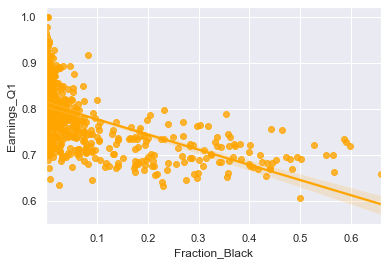

In [175]:
sns.set(font_scale = 1)
sns.regplot(data=race_scatter_q1, y ="Earnings_Q1", x ="Fraction_Black",fit_reg=True, color="orange")

<AxesSubplot:xlabel='Racial_Segregation', ylabel='Earnings_Q1'>

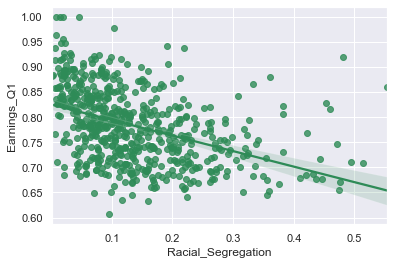

In [176]:
sns.regplot(data=race_scatter_q1, y ="Earnings_Q1", x ="Racial_Segregation",fit_reg=True, color="seagreen")

In [123]:
from scipy.stats import pearsonr

In [200]:
stat, p = pearsonr(race_scatter_q1.Earnings_Q1, race_scatter_q1.Fraction_Black)
print('Pearson Correlation between Earnings Q1 and \nFraction of African Americans in a Communting Zone show\n' + 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Correlation is Statistically Significant')

Pearson Correlation between Earnings Q1 and 
Fraction of African Americans in a Communting Zone show
stat=-0.575, p=0.000
Correlation is Statistically Significant


In [201]:
stat, p = pearsonr(race_scatter_q1.Earnings_Q1, race_scatter_q1.Racial_Segregation)
print('Pearson Correlation between Earnings Q1 and \nRacial Segregation in a Communting Zone show\n' \
      'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Correlation is Statistically Significant')

Pearson Correlation between Earnings Q1 and 
Racial Segregation in a Communting Zone show
stat=-0.415, p=0.000
Correlation is Statistically Significant


Now that we've explored our main variables, let's explore some of our covariates to understand the relaitonship between different variables in the model 

In [126]:
cz_employment_analysis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 2 to 740
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cz                             602 non-null    float64
 1   czname                         602 non-null    object 
 2   stateabbrv                     602 non-null    object 
 3   state_id                       602 non-null    object 
 4   Earnings_Q1                    602 non-null    float64
 5   Earnings_Q2                    602 non-null    float64
 6   Earnings_Q3                    602 non-null    float64
 7   Earnings_Q4                    602 non-null    float64
 8   Earnings_Q5                    602 non-null    float64
 9   Population                     602 non-null    float64
 10  Student_Teacher_Ratio          602 non-null    float64
 11  Violent_Crime                  602 non-null    float64
 12  Fraction_with_SingleMothers    602 non-null    flo

In [127]:
cz_employment_heatmap = cz_employment_analysis_clean[["Earnings_Q1","Student_Teacher_Ratio","Violent_Crime",
                                                      "Fraction_with_SingleMothers","Fraction_with_MarriedParents",
                                                      "Fraction_with_DivorcedParents","Fraction_Black","Racial_Segregation",
                                                      "Household_Income_PC","Social_Capital_Index"]]   

In [172]:
color = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

<AxesSubplot:>

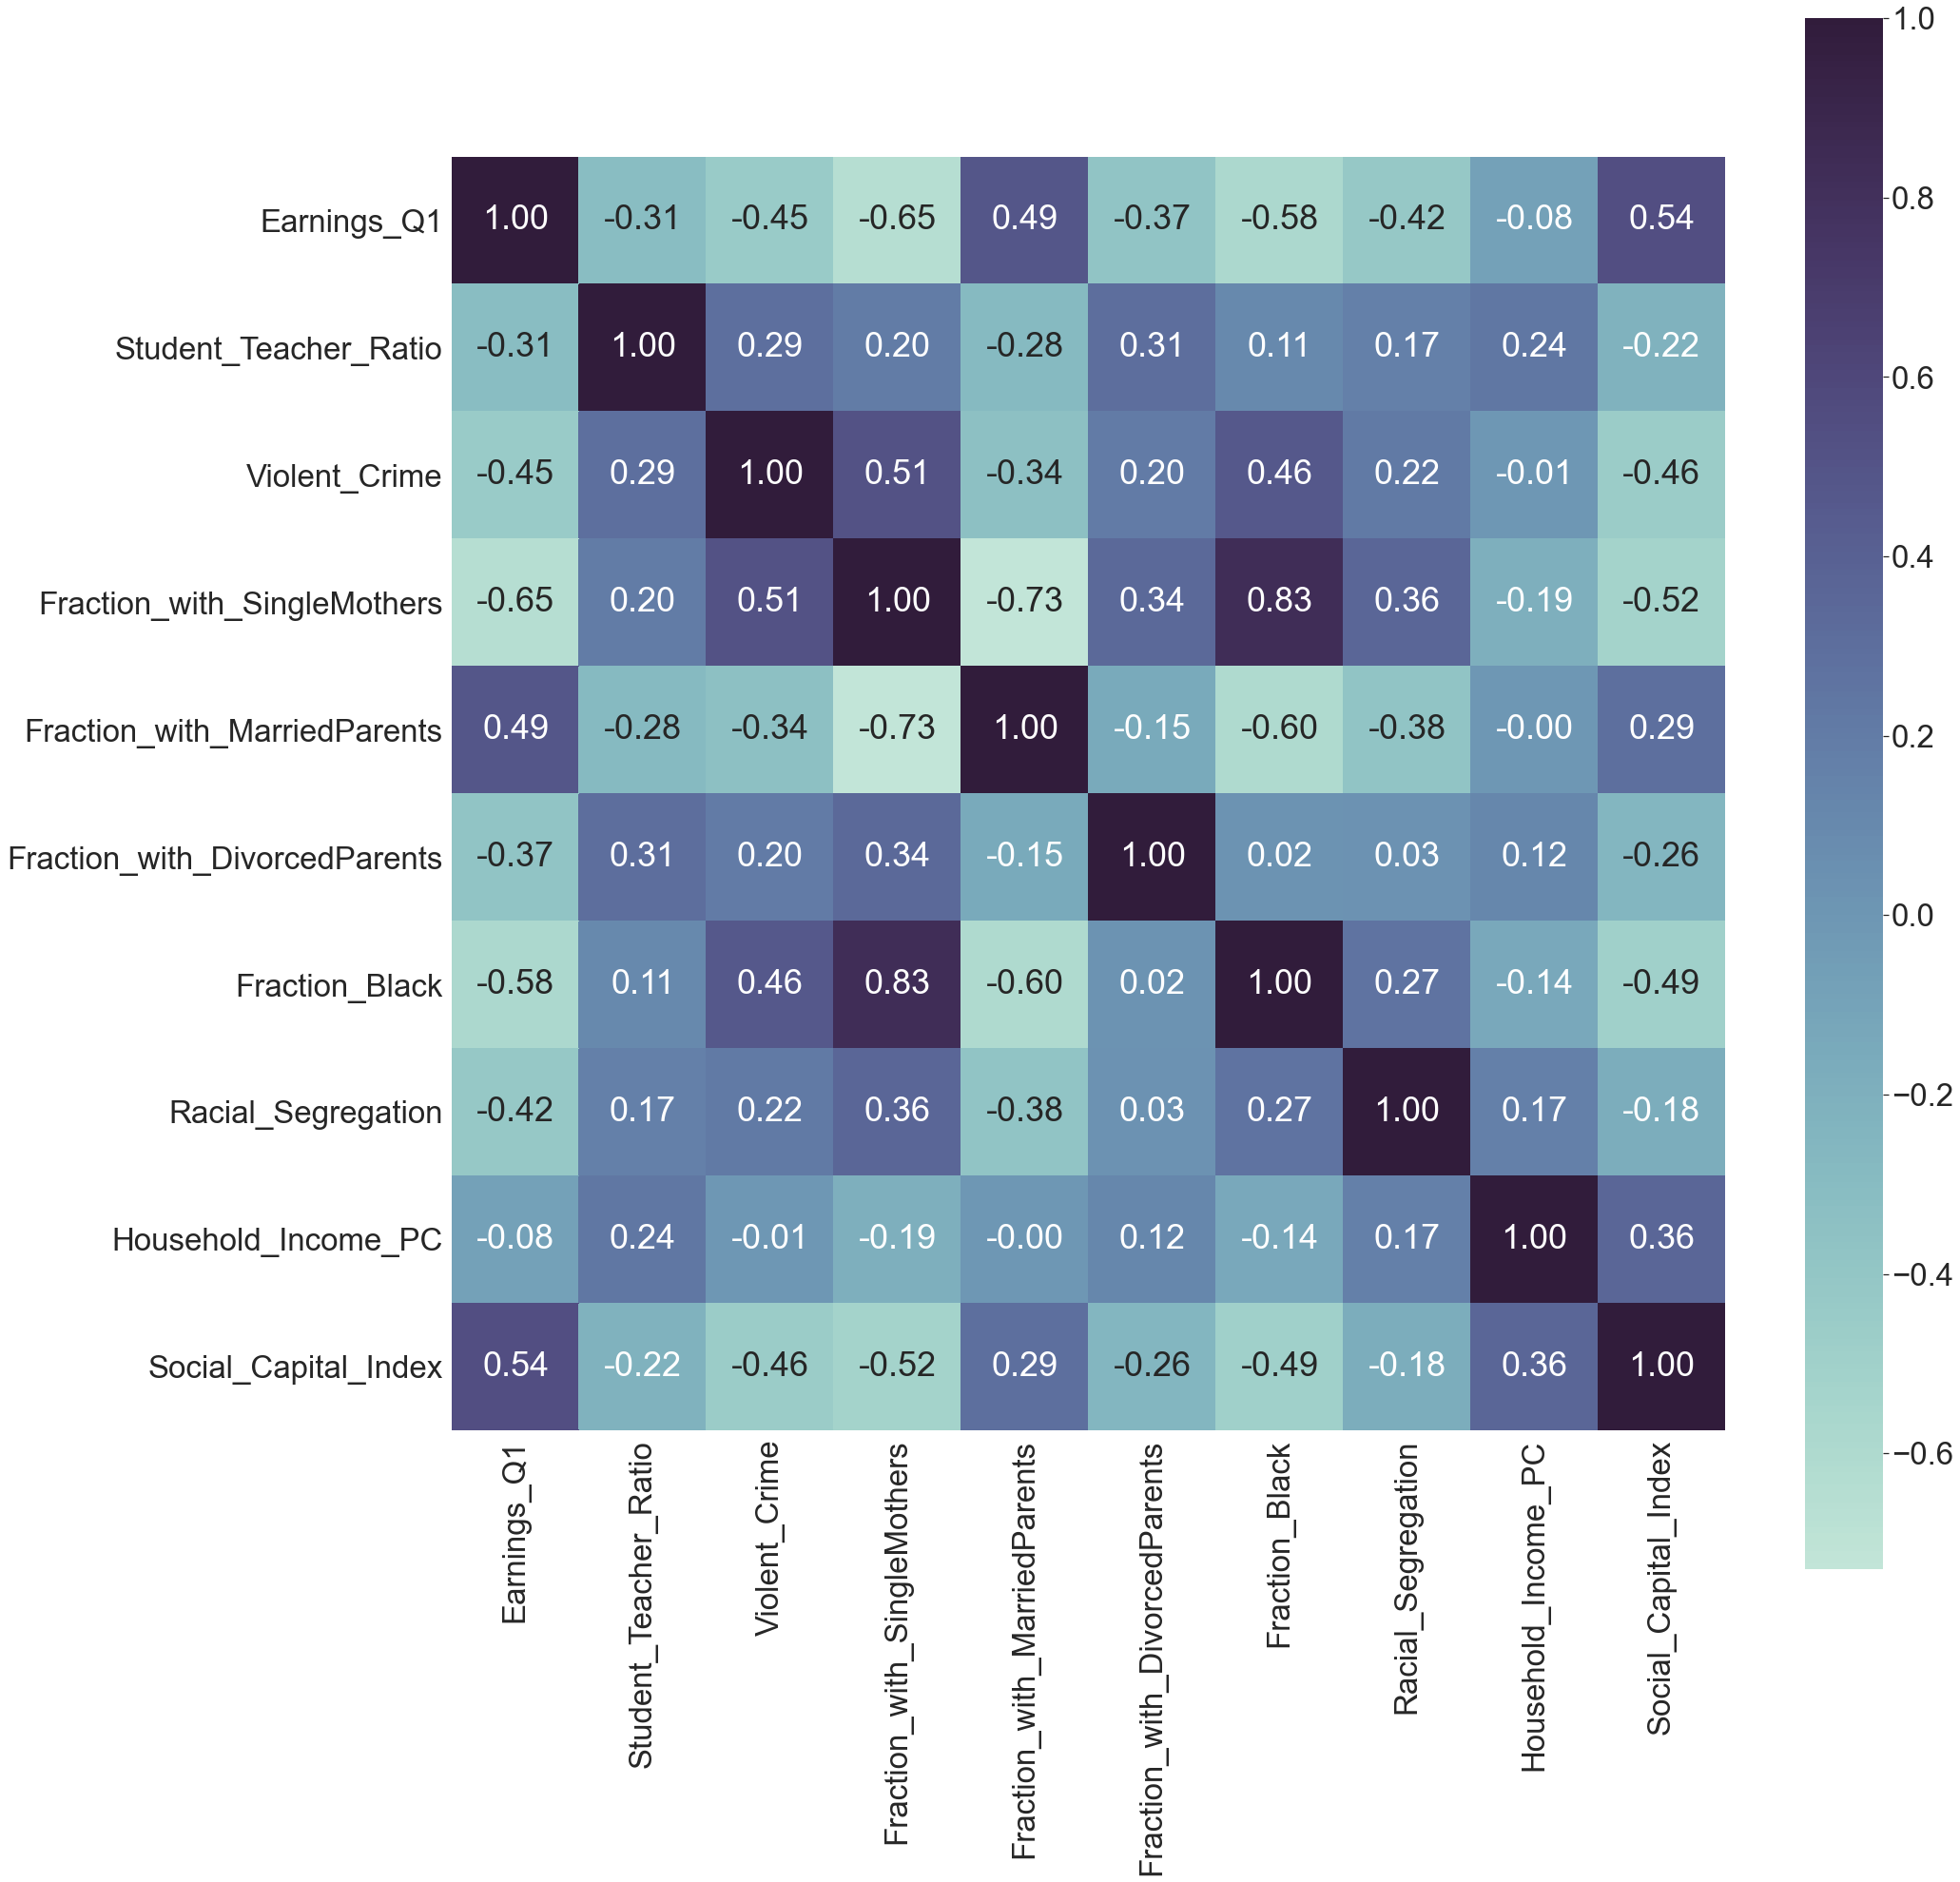

In [173]:
# Create heatmap
plt.figure(figsize=(30,30))
sns.set(font_scale = 3)
sns.heatmap((cz_employment_heatmap).corr(), vmax=1, annot=True, fmt='.2f',cmap=color, square=True)

Highly correlated variables to Earnings_Q1
Most correlated Greater than 0.5: Fraction with Single Mothers, Fraction Black, Married Parents 
Social Capital Index
Racial Segregation
Fraction Black
Fraction Married Paremts
Fraction Divorced Parents
Fraction with Single Mothers
Violent Crime

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
selected_variables = cz_employment_analysis_clean[["Earnings_Q1","Student_Teacher_Ratio","Violent_Crime",
                                                      "Fraction_with_SingleMothers","Fraction_with_MarriedParents",
                                                      "Fraction_Black","Racial_Segregation",
                                                      "Social_Capital_Index","Population"]]

In [259]:
y = selected_variables['Earnings_Q1']
x = selected_variables.drop(["Earnings_Q1"],1)

In [260]:
x = sm.add_constant(x)

In [261]:
import numpy as np
import statsmodels.api as sm

In [262]:
mod = sm.OLS(y, x, hasconst='add')

In [263]:
res = mod.fit()

In [264]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Earnings_Q1   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     87.48
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           3.06e-95
Time:                        08:46:23   Log-Likelihood:                 950.10
No. Observations:                 602   AIC:                            -1882.
Df Residuals:                     593   BIC:                            -1843.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           